In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Bhavani/Downloads/incomes.csv")

In [3]:
df.head()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
0,Armenia,Aragatsotn,NaN,Agro - Food&Cash Crop,8,2009.0,33.59216197,WFP VAM Impact of the Global Financial Crisis ...
1,Armenia,Aragatsotn,NaN,Asset Sales/Savings/Credit,8,2009.0,0.301407681,WFP VAM Impact of the Global Financial Crisis ...
2,Armenia,Aragatsotn,NaN,Commerce - Business/Trading,8,2009.0,3.810975935,WFP VAM Impact of the Global Financial Crisis ...
3,Armenia,Aragatsotn,NaN,Labor - Artisan/Skilled,8,2009.0,9.058316068,WFP VAM Impact of the Global Financial Crisis ...
4,Armenia,Aragatsotn,NaN,Labor - Daily/Unskilled - Mixed,8,2009.0,10.47505425,WFP VAM Impact of the Global Financial Crisis ...


In [4]:
df.tail()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
4365,Yemen,NaN,NaN,Labor - Salary/Regular,12,2011.0,33.51018565,WFP VAM The State of Food Security and Nutriti...
4366,Yemen,NaN,NaN,Non-Wage - Aid/Welfare,12,2011.0,2.537680957,WFP VAM The State of Food Security and Nutriti...
4367,Yemen,NaN,NaN,Non-Wage - Pension/Benefit,12,2011.0,2.047047847,WFP VAM The State of Food Security and Nutriti...
4368,Yemen,NaN,NaN,Non-Wage - Remittance/Fam. Aid,12,2011.0,8.87528672,WFP VAM The State of Food Security and Nutriti...
4369,Yemen,NaN,NaN,Other,12,2011.0,2.077772153,WFP VAM The State of Food Security and Nutriti...


In [5]:
df.shape

(4370, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ADM0_NAME          4370 non-null   object 
 1   ADM1_NAME          4022 non-null   object 
 2   ADM2_NAME          444 non-null    object 
 3   Income_Category    4349 non-null   object 
 4   Income_Month       4370 non-null   int64  
 5   Income_Year        4370 non-null   float64
 6   IncomeValue        4370 non-null   object 
 7   Income_DataSource  4345 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 273.3+ KB


In [7]:
df.describe(include='all')

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
count,4370,4022,444,4349,4370.000000,4370.000000,4370,4345
unique,32,363,68,27,NaN,NaN,3744,32
top,Senegal,$South/Amajyepfo,Lanao Del Norte,Labor - Salary/Regular,NaN,NaN,Baseline,"WFP VAM Analyse Globale de la Vulnerabilite, d..."
freq,256,54,12,370,NaN,NaN,25,256
mean,NaN,NaN,NaN,NaN,18.535240,1998.965904,NaN,NaN
std,NaN,NaN,NaN,NaN,151.007077,150.455385,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.350877,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,2009.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,7.000000,2010.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,9.000000,2012.000000,NaN,NaN


In [8]:
df.columns

Index(['ADM0_NAME', 'ADM1_NAME', 'ADM2_NAME', 'Income_Category',
       'Income_Month', 'Income_Year', 'IncomeValue', 'Income_DataSource'],
      dtype='object')

In [9]:
df.dtypes

ADM0_NAME             object
ADM1_NAME             object
ADM2_NAME             object
Income_Category       object
Income_Month           int64
Income_Year          float64
IncomeValue           object
Income_DataSource     object
dtype: object

In [10]:
df.isna().sum()

ADM0_NAME               0
ADM1_NAME             348
ADM2_NAME            3926
Income_Category        21
Income_Month            0
Income_Year             0
IncomeValue             0
Income_DataSource      25
dtype: int64

In [11]:
df['ADM1_NAME'].fillna("NAN",inplace = True)
df['ADM2_NAME'].fillna("NAN",inplace = True)
df['Income_Category'].fillna("NAN",inplace = True)
df['Income_DataSource'].fillna("NAN",inplace = True)

In [12]:
df.isnull().sum()

ADM0_NAME            0
ADM1_NAME            0
ADM2_NAME            0
Income_Category      0
Income_Month         0
Income_Year          0
IncomeValue          0
Income_DataSource    0
dtype: int64

In [13]:
df.nunique()

ADM0_NAME              32
ADM1_NAME             364
ADM2_NAME              69
Income_Category        28
Income_Month           13
Income_Year            31
IncomeValue          3744
Income_DataSource      33
dtype: int64

In [14]:
df["IncomeValue"].max()

'Baseline'

In [15]:
df['IncomeValue'].value_counts()

IncomeValue
Baseline       25
8.333333333    11
0.4            10
5              10
1.666666667    10
               ..
1.054650048     1
6.448641179     1
59.2353754      1
5.112851221     1
2.077772153     1
Name: count, Length: 3744, dtype: int64

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4365    False
4366    False
4367    False
4368    False
4369    False
Length: 4370, dtype: bool

In [17]:
df['IncomeValue'] = df['IncomeValue'].replace('Baseline', '0')

<Axes: xlabel='Income_Month'>

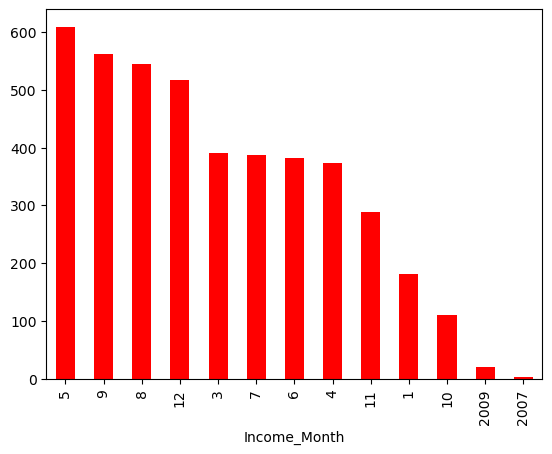

In [18]:
df['Income_Month'].value_counts().plot(kind='bar',color='Red')

<Axes: >

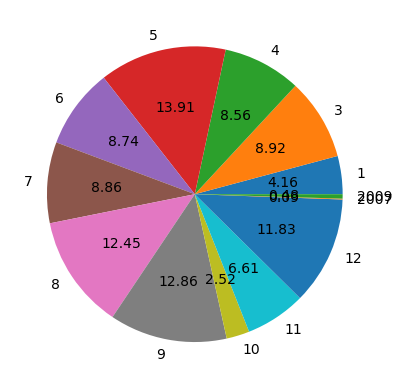

In [19]:
df.groupby('Income_Month').size().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Income_Month', ylabel='count'>

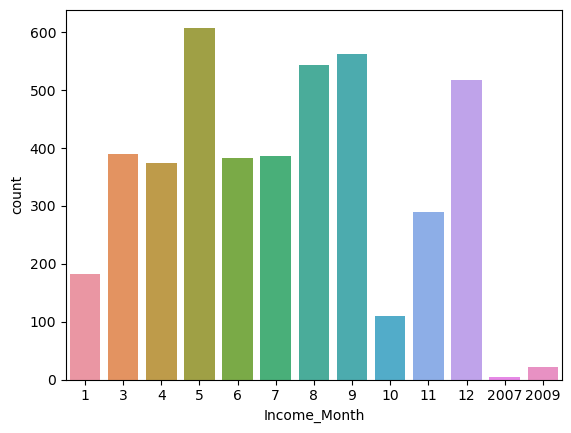

In [20]:
sns.countplot(x="Income_Month",data=df)

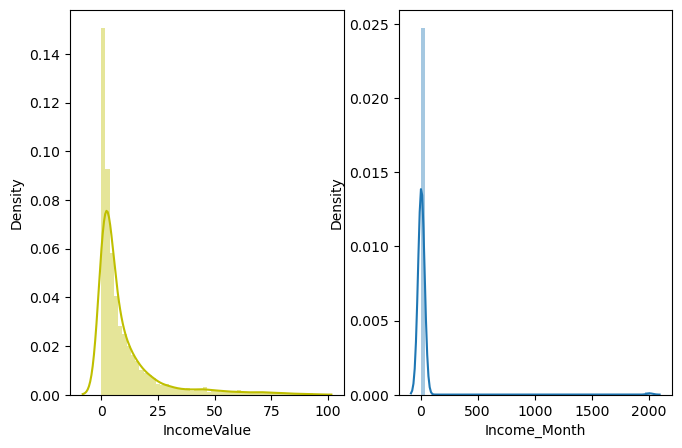

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.distplot(df["IncomeValue"],color="y")
plt.subplot(132)
sns.distplot(df["Income_Month"])
plt.show()

In [22]:
X = df.drop('Income_Month',axis = 1)
y = df['Income_Month']

In [23]:
names = X.columns

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
df.head(2)

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
0,Armenia,Aragatsotn,NAN,Agro - Food&Cash Crop,8,2009.0,33.59216197,WFP VAM Impact of the Global Financial Crisis ...
1,Armenia,Aragatsotn,NAN,Asset Sales/Savings/Credit,8,2009.0,0.301407681,WFP VAM Impact of the Global Financial Crisis ...


In [27]:
df['ADM0_NAME'] = le.fit_transform(df['ADM0_NAME'])
df['ADM1_NAME'] = le.fit_transform(df['ADM1_NAME'])
df['ADM2_NAME'] = le.fit_transform(df['ADM2_NAME'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Income_DataSource'] = le.fit_transform(df['Income_DataSource'])

In [28]:
df.head()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
0,0,61,58,5,8,2009.0,33.59216197,27
1,0,61,58,9,8,2009.0,0.301407681,27
2,0,61,58,10,8,2009.0,3.810975935,27
3,0,61,58,14,8,2009.0,9.058316068,27
4,0,61,58,16,8,2009.0,10.47505425,27


In [29]:
df.corr()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
ADM0_NAME,1.000000,-0.046389,-0.238465,-0.021154,-0.041859,0.048376,0.029358,0.438866
ADM1_NAME,-0.046389,1.000000,0.257379,0.025715,0.072995,-0.074312,-0.014103,-0.097379
ADM2_NAME,-0.238465,0.257379,1.000000,0.073301,-0.095305,0.097004,-0.058649,-0.056406
Income_Category,-0.021154,0.025715,0.073301,1.000000,0.030272,-0.030128,-0.322337,-0.004240
Income_Month,-0.041859,0.072995,-0.095305,0.030272,1.000000,-0.999696,-0.052194,-0.122326
Income_Year,0.048376,-0.074312,0.097004,-0.030128,-0.999696,1.000000,0.051430,0.126067
IncomeValue,0.029358,-0.014103,-0.058649,-0.322337,-0.052194,0.051430,1.000000,0.040824
Income_DataSource,0.438866,-0.097379,-0.056406,-0.004240,-0.122326,0.126067,0.040824,1.000000


<Axes: >

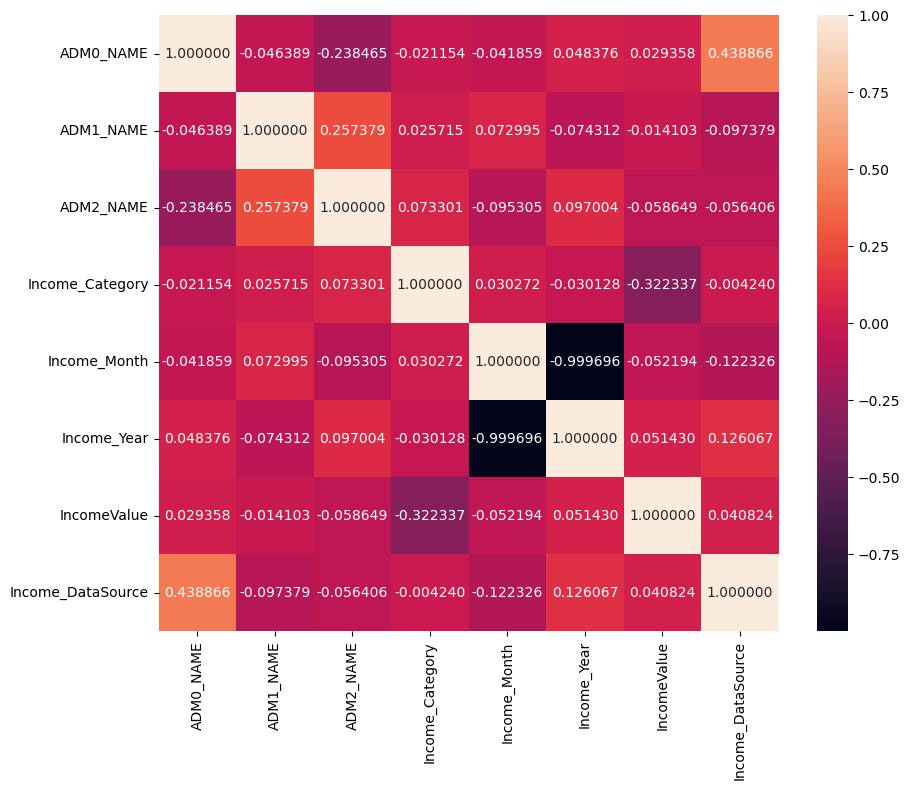

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True, fmt="2f", ax=ax)

In [31]:
df.tail()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
4365,31,246,58,18,12,2011.0,33.51018565,31
4366,31,246,58,21,12,2011.0,2.537680957,31
4367,31,246,58,22,12,2011.0,2.047047847,31
4368,31,246,58,23,12,2011.0,8.87528672,31
4369,31,246,58,27,12,2011.0,2.077772153,31


In [32]:
df.head()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
0,0,61,58,5,8,2009.0,33.59216197,27
1,0,61,58,9,8,2009.0,0.301407681,27
2,0,61,58,10,8,2009.0,3.810975935,27
3,0,61,58,14,8,2009.0,9.058316068,27
4,0,61,58,16,8,2009.0,10.47505425,27


In [33]:
y = df['Income_Month']
x = df.drop(columns = ['Income_Month'])

In [34]:
# scaling
from sklearn.preprocessing import StandardScaler

In [35]:
scale = StandardScaler()

In [36]:
names = x.columns

In [37]:
x = scale.fit_transform(x)

In [38]:
x

array([[-1.67842658, -1.22371462,  0.25089404, ...,  0.06669914,
         1.61776967,  1.11040049],
       [-1.67842658, -1.22371462,  0.25089404, ...,  0.06669914,
        -0.66727152,  1.11040049],
       [-1.67842658, -1.22371462,  0.25089404, ...,  0.06669914,
        -0.42637857,  1.11040049],
       ...,
       [ 1.58495984,  0.59909236,  0.25089404, ...,  0.07999364,
        -0.54745267,  1.52319053],
       [ 1.58495984,  0.59909236,  0.25089404, ...,  0.07999364,
        -0.07876978,  1.52319053],
       [ 1.58495984,  0.59909236,  0.25089404, ...,  0.07999364,
        -0.54534379,  1.52319053]])

In [39]:
x = pd.DataFrame(x,columns = names)

In [40]:
x.head()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Year,IncomeValue,Income_DataSource
0,-1.678427,-1.223715,0.250894,-1.121756,0.066699,1.617770,1.1104
1,-1.678427,-1.223715,0.250894,-0.607156,0.066699,-0.667272,1.1104
2,-1.678427,-1.223715,0.250894,-0.478507,0.066699,-0.426379,1.1104
3,-1.678427,-1.223715,0.250894,0.036093,0.066699,-0.066207,1.1104
4,-1.678427,-1.223715,0.250894,0.293392,0.066699,0.031037,1.1104


In [41]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3496, 7)
(874, 7)
(3496,)
(874,)


In [44]:
df.head()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
0,0,61,58,5,8,2009.0,33.59216197,27
1,0,61,58,9,8,2009.0,0.301407681,27
2,0,61,58,10,8,2009.0,3.810975935,27
3,0,61,58,14,8,2009.0,9.058316068,27
4,0,61,58,16,8,2009.0,10.47505425,27


In [45]:
df['Income_Month'] = np.where(df['Income_Month']=="3+",4,df['Income_Month'])

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income_Month'] = le.fit_transform(df['Income_Month'])

In [47]:
y = df['Income_Month']
x = df.drop(columns = ['Income_Month'])

In [48]:
names = x.columns

In [49]:
x = scale.fit_transform(x)

In [50]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Instantiate regression models
linear_regression = LinearRegression()
random_forest_regressor = RandomForestRegressor()
adaboost_regressor = AdaBoostRegressor()
gradient_boosting = GradientBoostingRegressor()
knn_regressor = KNeighborsRegressor()

In [53]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [54]:
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
adaboost_regressor.fit(x_train, y_train)

AdaBoostRegressor()

In [56]:
gradient_boosting.fit(x_train, y_train)

GradientBoostingRegressor()

In [57]:
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [58]:
train_pred_lr = linear_regression.predict(x_train)
train_pred_rf = random_forest_regressor.predict(x_train)
train_pred_ab = adaboost_regressor.predict(x_train)
train_pred_gb = gradient_boosting.predict(x_train)
train_pred_knn = knn_regressor.predict(x_train)

In [59]:
test_pred_lr = linear_regression.predict(x_test)
test_pred_rf = random_forest_regressor.predict(x_test)
test_pred_ab = adaboost_regressor.predict(x_test)
test_pred_gb = gradient_boosting.predict(x_test)
test_pred_knn = knn_regressor.predict(x_test)

In [60]:
# Calculate RMSE for training and test sets
train_rmse_lr = np.sqrt(mean_squared_error(y_train, train_pred_lr))
train_rmse_rf = np.sqrt(mean_squared_error(y_train, train_pred_rf))
train_rmse_ab = np.sqrt(mean_squared_error(y_train, train_pred_ab))
train_rmse_gb = np.sqrt(mean_squared_error(y_train, train_pred_gb))
train_rmse_knn = np.sqrt(mean_squared_error(y_train, train_pred_knn))

test_rmse_lr = np.sqrt(mean_squared_error(y_test, test_pred_lr))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, test_pred_rf))
test_rmse_ab = np.sqrt(mean_squared_error(y_test, test_pred_ab))
test_rmse_gb = np.sqrt(mean_squared_error(y_test, test_pred_gb))
test_rmse_knn = np.sqrt(mean_squared_error(y_test, test_pred_knn))

In [61]:
# Print RMSE for each model
print("Linear Regression Training RMSE:", train_rmse_lr)
print("RandomForest Regressor Training RMSE:", train_rmse_rf)
print("AdaBoost Regressor Training RMSE:", train_rmse_ab)
print("Gradient Boosting Training RMSE:", train_rmse_gb)
print("KNN Training RMSE:", train_rmse_knn)

print("Linear Regression Test RMSE:", test_rmse_lr)
print("RandomForest Regressor Test RMSE:", test_rmse_rf)
print("AdaBoost Regressor Test RMSE:", test_rmse_ab)
print("Gradient Boosting Test RMSE:", test_rmse_gb)
print("KNN Test RMSE:", test_rmse_knn)

Linear Regression Training RMSE: 2.6989064274210888
RandomForest Regressor Training RMSE: 0.012949028748819643
AdaBoost Regressor Training RMSE: 1.7553322945524963
Gradient Boosting Training RMSE: 0.27093606562017963
KNN Training RMSE: 1.1438923474336047
Linear Regression Test RMSE: 2.683806190292943
RandomForest Regressor Test RMSE: 0.013131093986816866
AdaBoost Regressor Test RMSE: 1.781526272936602
Gradient Boosting Test RMSE: 0.25010358759033513
KNN Test RMSE: 1.2604528625713467


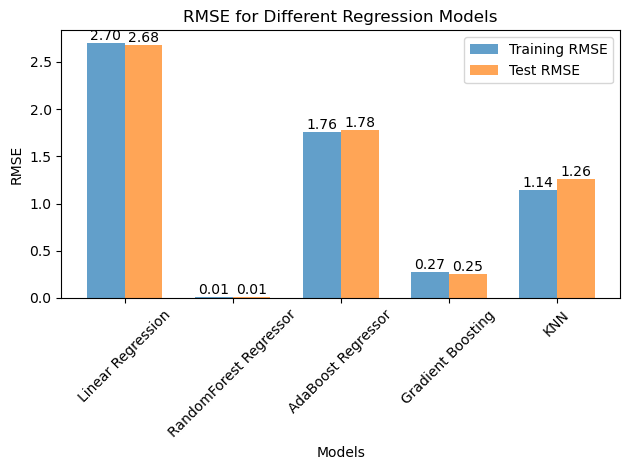

In [62]:
# RMSE values for each model on both training and test sets
models = ['Linear Regression', 'RandomForest Regressor', 'AdaBoost Regressor', 'Gradient Boosting', 'KNN']
train_rmse = [train_rmse_lr, train_rmse_rf, train_rmse_ab, train_rmse_gb, train_rmse_knn]
test_rmse = [test_rmse_lr, test_rmse_rf, test_rmse_ab, test_rmse_gb, test_rmse_knn]

# Bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Create bar plots for training and test RMSE
plt.bar(index, train_rmse, bar_width, label='Training RMSE', alpha=0.7)
plt.bar(index + bar_width, test_rmse, bar_width, label='Test RMSE', alpha=0.7)

# Annotate the bars with RMSE values
for i in range(len(models)):
    plt.text(index[i], train_rmse[i], f'{train_rmse[i]:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(index[i] + bar_width, test_rmse[i], f'{test_rmse[i]:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Regression Models')
plt.xticks(index + bar_width / 2, models, rotation=45)  # Rotate the x-axis labels
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
df.tail(180)

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_Month,Income_Year,IncomeValue,Income_DataSource
4190,31,54,58,10,10,2011.0,7.022698988,31
4191,31,54,58,11,10,2011.0,0.576121586,31
4192,31,54,58,15,10,2011.0,10.94631013,31
4193,31,54,58,17,10,2011.0,8.150666614,31
4194,31,54,58,18,10,2011.0,21.52284082,31
...,...,...,...,...,...,...,...,...
4365,31,246,58,18,10,2011.0,33.51018565,31
4366,31,246,58,21,10,2011.0,2.537680957,31
4367,31,246,58,22,10,2011.0,2.047047847,31
4368,31,246,58,23,10,2011.0,8.87528672,31


In [65]:
random_forest_regressor.predict([[0,213,58,18,2009.0,20.118277,27]])

array([8.68])

In [66]:
random_forest_regressor.predict([[31,54,58,18,2011.0,7.022699,31]])

array([10.])

In [67]:
random_forest_regressor.predict([[31,246,58,21,2011.0,2.537681,31]])

array([10.])

In [68]:
random_forest_regressor.predict([[31,246,58,27,2011.0,2.077772,31]])

array([10.])

In [69]:
import pickle

In [70]:
with open('random_forest_regressor_pickle','wb') as f:
    pickle.dump(random_forest_regressor,f)